In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movie=pd.read_csv('/content/drive/MyDrive/colab/kaggle/Netflix_Dataset_Movie.csv')
rate=pd.read_csv('/content/drive/MyDrive/colab/kaggle/Netflix_Dataset_Rating.csv')

# 2. 데이터 전처리

In [3]:
movie.head()
len(movie['Movie_ID'].unique())

17770

In [4]:
rate.head()

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3


In [5]:
len(rate['User_ID'].unique())

143458

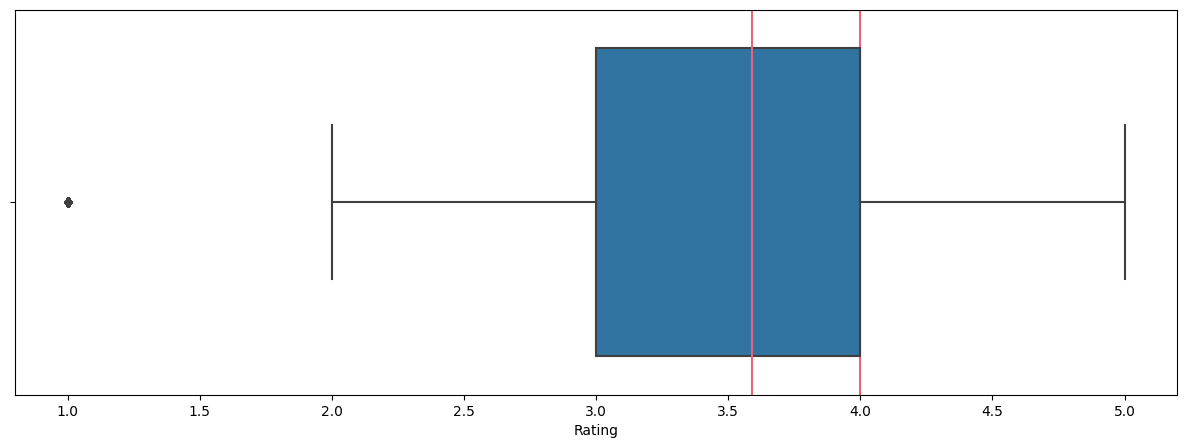

In [ ]:
plt.figure(figsize=(15,5))

sns.boxplot(x=rate['Rating'])
plt.axvline(x=rate['Rating'].mean(), color='#E96479',linestyle='-')
plt.axvline(x=rate['Rating'].median(), color='#E96479',linestyle='-')

In [3]:
test=pd.DataFrame(rate.groupby('User_ID')['Rating'].median())
rate=pd.merge(rate,test, how='left', on='User_ID')

In [4]:
df=rate[rate['Rating_x']>=rate['Rating_y']]
df.shape

(12056712, 4)

In [5]:
df=df[['User_ID','Movie_ID']]

# 3. 분석

In [9]:
df.shape

(12056712, 2)

In [6]:
d_list=list(df.groupby('User_ID')['Movie_ID'].apply(list))

In [7]:
import mlxtend.preprocessing
import mlxtend.frequent_patterns

online_encoder = mlxtend.preprocessing.TransactionEncoder()
online_encoder_array = online_encoder.fit_transform(d_list)

In [8]:
df1=pd.DataFrame(online_encoder_array, columns=online_encoder.columns_)

In [17]:
df1.head()

,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
0,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
model=mlxtend.frequent_patterns.apriori(df1, use_colnames=True, min_support=0.2)


In [16]:
model['count']=model['itemsets'].apply(lambda x:len(x))
model.tail()

,support,itemsets,count
1425,0.218113,"(2862, 1905, 4306, 3962, 2782)",5
1426,0.207517,"(3938, 1905, 4306, 3962, 2782)",5
1427,0.213317,"(3938, 2862, 1905, 4306, 3962)",5
1428,0.214488,"(2862, 4306, 2452, 3962, 2782)",5
1429,0.201536,"(3938, 2862, 4306, 2452, 3962)",5


In [18]:
model[model['count']==5].sort_values('support', ascending=False)[:4]

,support,itemsets,count
1416,0.235972,"(2862, 1905, 4306, 2452, 2782)",5
1423,0.234543,"(2862, 1905, 4306, 2452, 3962)",5
1420,0.231566,"(1905, 4306, 2452, 3962, 2782)",5
1424,0.229858,"(3938, 1905, 4306, 2452, 3962)",5


In [ ]:
movie['About' in movie['Movie_ID']]

In [20]:
movie[movie['Movie_ID'].isin([2862, 1905, 4306, 2452, 2782])]

,Movie_ID,Year,Name
1904,1905,2003,Pirates of the Caribbean: The Curse of the Bla...
2451,2452,2001,Lord of the Rings: The Fellowship of the Ring
2781,2782,1995,Braveheart
2861,2862,1991,The Silence of the Lambs
4305,4306,1999,The Sixth Sense


* association rule

In [21]:
df2 = mlxtend.frequent_patterns.association_rules(model,metric="confidence",
    min_threshold=0.6, 
    support_only=False)

In [27]:
df2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(30),(1905),0.40225,0.704757,0.307623,0.764756,1.085134,0.024135,1.255050
1,(30),(2452),0.40225,0.650839,0.265325,0.659602,1.013465,0.003525,1.025745
2,(30),(2782),0.40225,0.561607,0.244253,0.607216,1.081212,0.018346,1.116117
3,(30),(2862),0.40225,0.606658,0.256451,0.637542,1.050908,0.012423,1.085206
4,(30),(3938),0.40225,0.552420,0.261847,0.650955,1.178370,0.039636,1.282300


<Axes: xlabel='support', ylabel='confidence'>

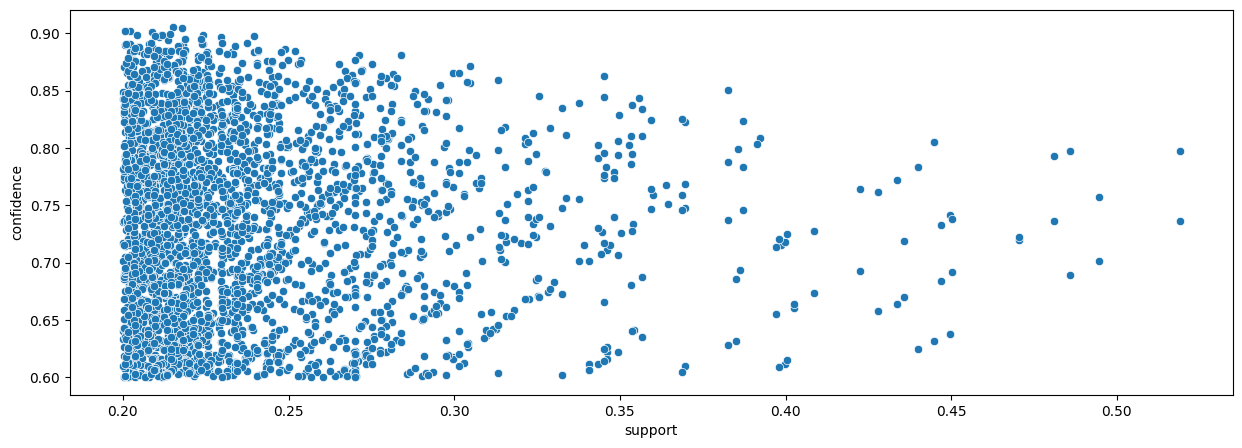

In [26]:
plt.figure(figsize=(15,5))


sns.scatterplot(x='support', y='confidence', data=df2)

<Axes: xlabel='leverage', ylabel='conviction'>

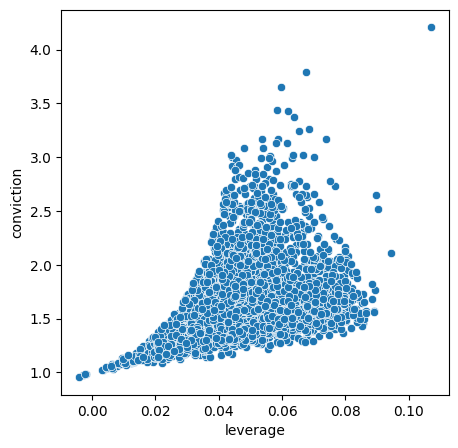

In [29]:
plt.figure(figsize=(5,5))


sns.scatterplot(x='leverage', y='conviction', data=df2)

In [39]:
df2[(df2['support']<=0.26)&(df2['confidence']>=0.85)&(df2['conviction']>=2)].sort_values('conviction', ascending=False)[:15]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
229,(3610),(1798),0.251488,0.441328,0.218099,0.867232,1.965052,0.107110,4.207887
1750,"(3938, 3079)",(3962),0.235205,0.609698,0.210996,0.897072,1.471339,0.067592,3.791991
1742,"(4043, 2862)",(4306),0.237596,0.653480,0.215066,0.905178,1.385165,0.059802,3.654430
1861,"(4306, 2782, 191)",(2452),0.235254,0.650839,0.211393,0.898575,1.380642,0.058281,3.442550
1800,"(1905, 2782, 191)",(2452),0.249732,0.650839,0.224296,0.898147,1.379984,0.061761,3.428078
1574,"(2452, 3079)",(3962),0.231956,0.609698,0.205119,0.884301,1.450393,0.063696,3.373429
1322,"(1905, 3079)",(3962),0.252792,0.609698,0.222581,0.880491,1.444143,0.068454,3.265878
1752,"(4306, 3079)",(3962),0.242357,0.609698,0.213198,0.879688,1.442827,0.065434,3.244091
1807,"(1905, 2862, 191)",(2452),0.244999,0.650839,0.218043,0.889976,1.367430,0.058588,3.173513
2603,"(1905, 3106, 2862)",(4306),0.225690,0.653480,0.201007,0.890632,1.362906,0.053523,3.168388


In [40]:
movie[movie['Movie_ID'].isin([2122, 2862, 571])]

,Movie_ID,Year,Name
570,571,1999,American Beauty
2121,2122,1999,Being John Malkovich
2861,2862,1991,The Silence of the Lambs
